In [ ]:
files = {
    "GraphKANLoc(ours)": "Gkan_Cheku.csv",
    "Tkan": "tkan_x_datasets.csv",
    "Transformer": "Transformer_Cheku.csv",
    "LSTM": "Naive_LSTM_cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "AGNNConv": "Zigbee_Cheku.csv",
    "GLoc": "GLoc_CheKu_Predictions.csv",
    "KF": "KF_Cheku.csv"
}

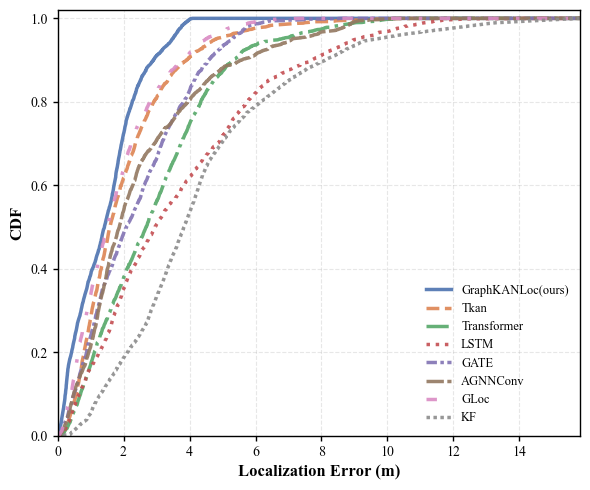

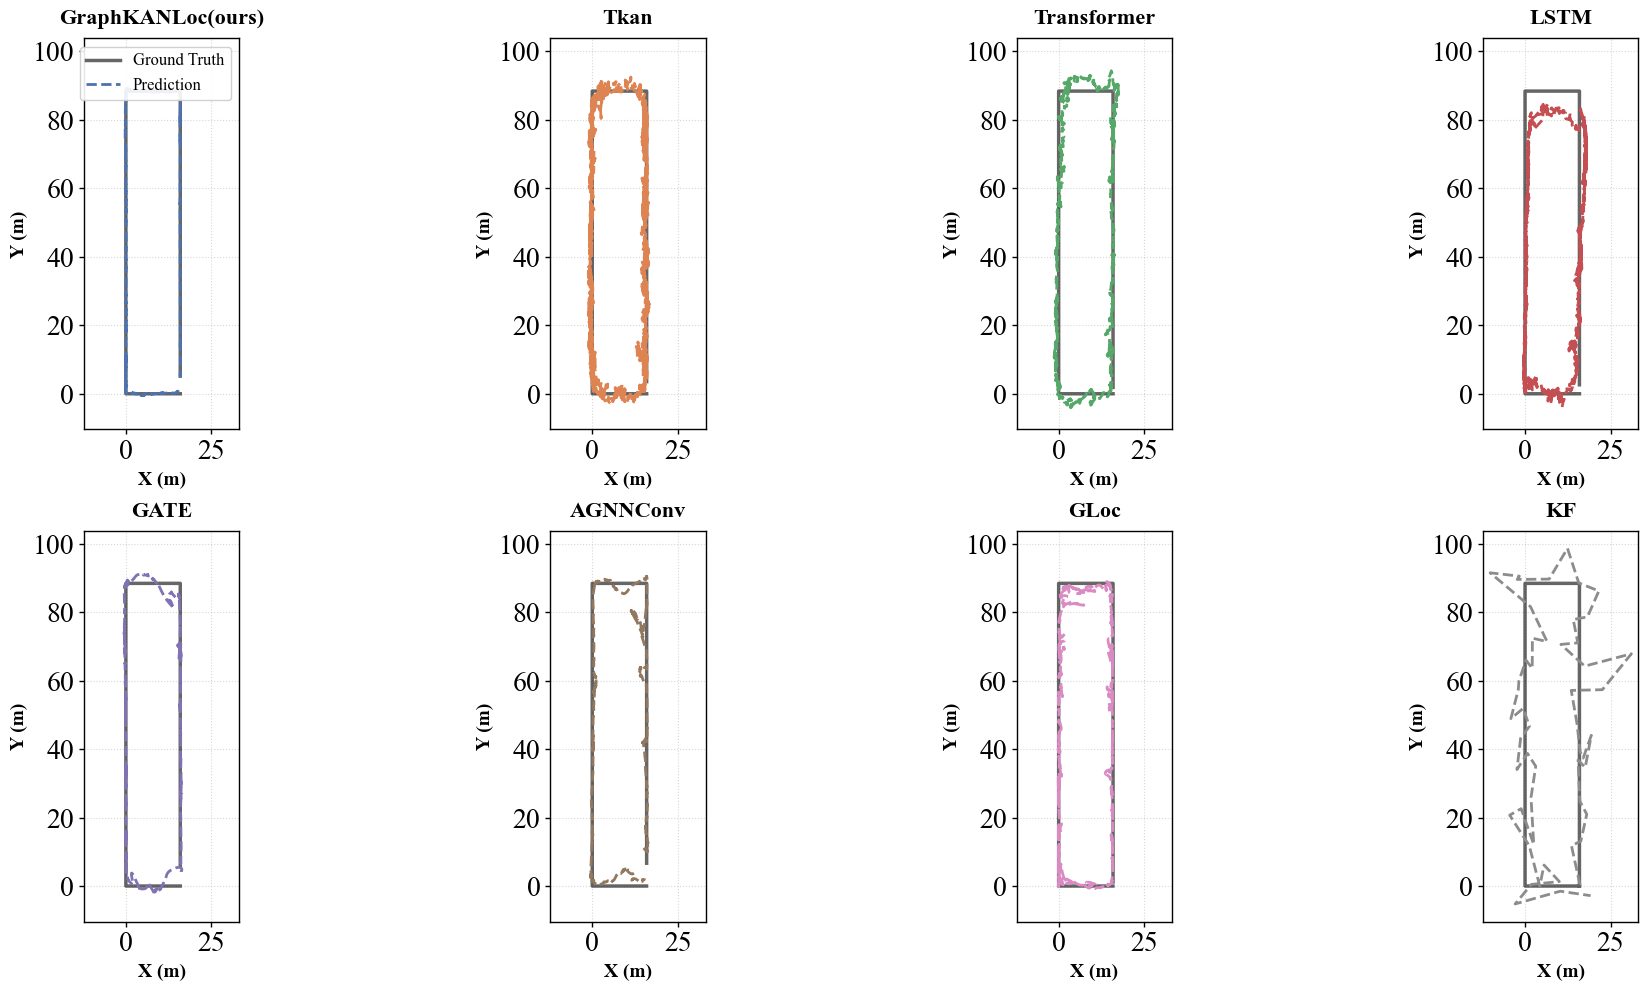

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# 1. 设置 Nature 期刊风格 (Plotting Style)
# ==========================================
# 使用无衬线字体 (如 Arial/Helvetica)，字号适中，边框线宽合适
plt.rcParams['font.family'] = 'Times New Roman'
# 如果本地有 Arial 字体，取消下面这行的注释
# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.frameon'] = False  # 图例无边框，更简洁

# ==========================================
# 2. 数据准备 (Data Preparation)
# ==========================================
# 请在这里配置您的模型名称和对应的 CSV 文件路径
files = {
    "GraphKANLoc(ours)": "Gkan_Cheku.csv",
    "Tkan": "tkan_x_datasets.csv",
    "Transformer": "Transformer_Cheku.csv",
    "LSTM": "Naive_LSTM_cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "AGNNConv": "Zigbee_Cheku.csv",
    "GLoc": "GLoc_CheKu.csv",
    "KF": "KF_Cheku.csv"
}

data = {}
errors = {}

# 读取数据并计算定位误差
for name, fpath in files.items():
    if os.path.exists(fpath):
        # 读取 CSV
        df = pd.read_csv(fpath)
        data[name] = df
        
        # 提取坐标列 (假设列名固定，如果不固定可在此处修改)
        # 误差计算公式: Euclidean Distance = sqrt((x_true - x_pred)^2 + (y_true - y_pred)^2)
        px, py = df['Pred_X'], df['Pred_Y']
        tx, ty = df['True_X'], df['True_Y']
        
        # 计算欧几里得误差
        error = np.sqrt((tx - px)**2 + (ty - py)**2)
        errors[name] = error
    else:
        print(f"Warning: File {fpath} not found.")


# ==========================================
# 3. 绘制 CDF 图 (CDF Plot) 
# ==========================================
# plt.figure(figsize=(6, 5))
# colors = sns.color_palette("deep", len(errors))

# # 1. 找到所有数据中的最大误差值，作为统一的 x 轴延伸终点
# all_max_errors = [np.max(err) for err in errors.values() if len(err) > 0]
# # 如果没有数据，默认设为 0 以防报错
# global_max_error = max(all_max_errors) if all_max_errors else 0

# for i, (name, err) in enumerate(errors.items()):
#     if len(err) == 0: continue
    
#     # 排序误差
#     sorted_error = np.sort(err)
    
#     # 2. 修改累积概率计算: 使用 1 到 N 除以 N，确保最后一个点的概率是 1.0
#     yvals = np.arange(1, len(sorted_error) + 1) / float(len(sorted_error))
    
#     # 3. 关键步骤：在数组末尾追加一个点，使线条延伸到 global_max_error
#     # 坐标为 (global_max_error, 1.0)
#     sorted_error = np.append(sorted_error, global_max_error)
#     yvals = np.append(yvals, 1.0)
    
#     plt.plot(sorted_error, yvals, label=name, color=colors[i], linewidth=2)

# # 添加标签和标题
# plt.xlabel('Localization Error (m)', fontsize=12)
# plt.ylabel('CDF', fontsize=12)
# plt.title('CDF of Localization Errors', fontsize=12, fontweight='bold')

# # 美化细节
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.legend(loc='lower right', fontsize=9)

# # 设置 x 轴范围，确保能看到延伸效果
# plt.xlim(0, global_max_error) 
# plt.ylim(0, 1.02) # y 轴略微留白

# plt.tight_layout()

# # 保存图片
# plt.savefig('CDF_Comparison_Nature_Extended.png', dpi=300, bbox_inches='tight')
# plt.show()
# ==========================================
# 3. 绘制 CDF 图 (CDF Plot) - 颜色+线型区分版
# ==========================================
plt.figure(figsize=(6, 5))

# 1. 定义颜色调色板
colors = sns.color_palette("deep", len(errors))

# 2. 定义线型列表 (顺序循环使用)
# '-' : 实线 (Solid)
# '--': 虚线 (Dashed)
# '-.': 点划线 (Dash-dot)
# ':' : 点线 (Dotted)
# (0, (3, 1, 1, 1)): 特殊点划线
# (0, (5, 1)): 长虚线
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (1, 1))]

# 3. 找到全局最大误差，用于延伸线条
all_max_errors = [np.max(err) for err in errors.values() if len(err) > 0]
global_max_error = max(all_max_errors) if all_max_errors else 0

for i, (name, err) in enumerate(errors.items()):
    if len(err) == 0: continue
    
    # --- 数据处理 ---
    sorted_error = np.sort(err)
    # y轴: 1/N 到 1.0
    yvals = np.arange(1, len(sorted_error) + 1) / float(len(sorted_error))
    
    # 延伸数据到 global_max_error
    sorted_error = np.append(sorted_error, global_max_error)
    yvals = np.append(yvals, 1.0)
    
    # --- 绘图配置 ---
    # 获取对应的线型 (如果模型数量超过线型数量，取余循环)
    current_ls = linestyles[i % len(linestyles)]
    
    # 稍微加粗一点线条 (linewidth=2.5) 以便看清虚线细节
    plt.plot(sorted_error, yvals, 
             label=name, 
             color=colors[i], 
             linestyle=current_ls, 
             linewidth=2.5, 
             alpha=0.9)

# 添加标签和标题
plt.xlabel('Localization Error (m)', fontsize=12, fontweight='bold')
plt.ylabel('CDF', fontsize=12, fontweight='bold')
# plt.title('CDF of Localization Errors', fontsize=12, fontweight='bold')

# 美化细节
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='lower right', fontsize=9)

# 设置范围
plt.xlim(0, global_max_error)
plt.ylim(0, 1.02)

plt.tight_layout()

# 保存图片
plt.savefig('CDF_Comparison_Nature_Styled.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 步骤 A: 计算全局统一的坐标轴范围 (关键步骤) ---
# 这能确保所有子图的物理尺寸完全一致，且便于横向对比
all_x_values = []
all_y_values = []

for df in data.values():
    # 将真实值和预测值都加入计算，以免预测值跑出框外
    all_x_values.extend(df['True_X'].values)
    all_x_values.extend(df['Pred_X'].values)
    all_y_values.extend(df['True_Y'].values)
    all_y_values.extend(df['Pred_Y'].values)

# 获取极值
x_min, x_max = min(all_x_values), max(all_x_values)
y_min, y_max = min(all_y_values), max(all_y_values)

# 加一点留白 (Padding)，比如 5%
x_margin = (x_max - x_min) * 0.05
y_margin = (y_max - y_min) * 0.05

global_xlim = (x_min - x_margin, x_max + x_margin)
global_ylim = (y_min - y_margin, y_max + y_margin)

# --- 绘图 ---
num_plots = len(data)
cols = 4  
rows = (num_plots + cols - 1) // cols

# 调整 figsize，确保有足够空间
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()

for i, (name, df) in enumerate(data.items()):
    ax = axes[i]
    
    # 绘制轨迹
    ax.plot(df['True_X'], df['True_Y'], 'k-', label='Ground Truth', linewidth=2.5, alpha=0.6)
    ax.plot(df['Pred_X'], df['Pred_Y'], '--', label='Prediction', linewidth=2, color=colors[i])
    
    # 设置标题和标签
    ax.set_title(name, fontsize=16, fontweight='bold', pad=10)
    ax.set_xlabel('X (m)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Y (m)', fontsize=14, fontweight='bold')
    
    # 设置刻度文字大小
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    # --- 步骤 B: 应用全局统一范围 ---
    ax.set_xlim(global_xlim)
    ax.set_ylim(global_ylim)
    
    # --- 步骤 C: 关键设置 ---
    # adjustable='box': 强制改变绘图框的形状来适应数据比例，导致大小不一
    # adjustable='datalim': 改变数据限制来适应绘图框 (但在 set_xlim 锁死的情况下，box 也是固定的)
    # 因为我们锁死了 xlim/ylim，这里直接用 equal 即可保证方框大小一致
    ax.set_aspect('equal', adjustable='box') 
    
    ax.grid(True, linestyle=':', alpha=0.5)
    
    if i == 0:
        ax.legend(fontsize=12, loc='upper right', frameon=True, framealpha=0.9)

# 隐藏多余子图
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(wspace=0.25, hspace=0.3)
plt.tight_layout()
plt.savefig('Trajectory_Comparison_FixedSize.png', dpi=300, bbox_inches='tight')
plt.show()

正在读取数据...
  -> 已加载: GraphKANLoc(ours) (样本数: 2603)
  -> 已加载: Tkan (样本数: 2622)
  -> 已加载: Transformer (样本数: 2642)
  -> 已加载: LSTM (样本数: 2633)
  -> 已加载: GATE (样本数: 2594)
  -> 已加载: AGNNConv (样本数: 2584)
  -> 已加载: GLoc (样本数: 2649)
  -> 已加载: KF (样本数: 2688)


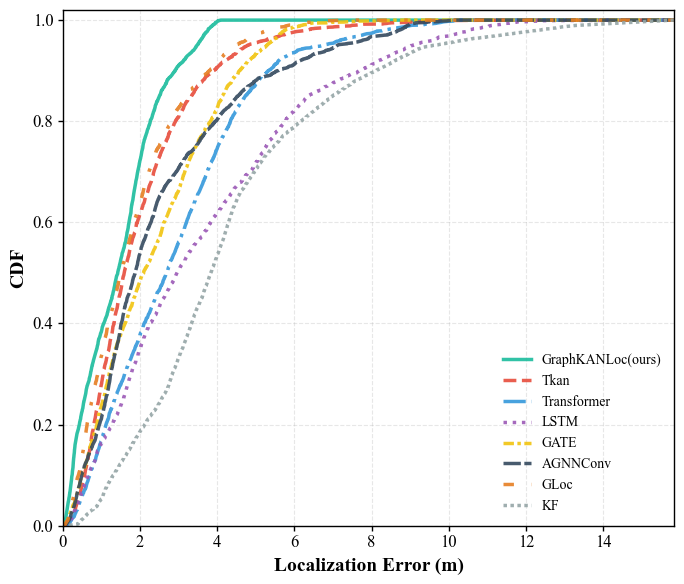

CDF 图已保存。


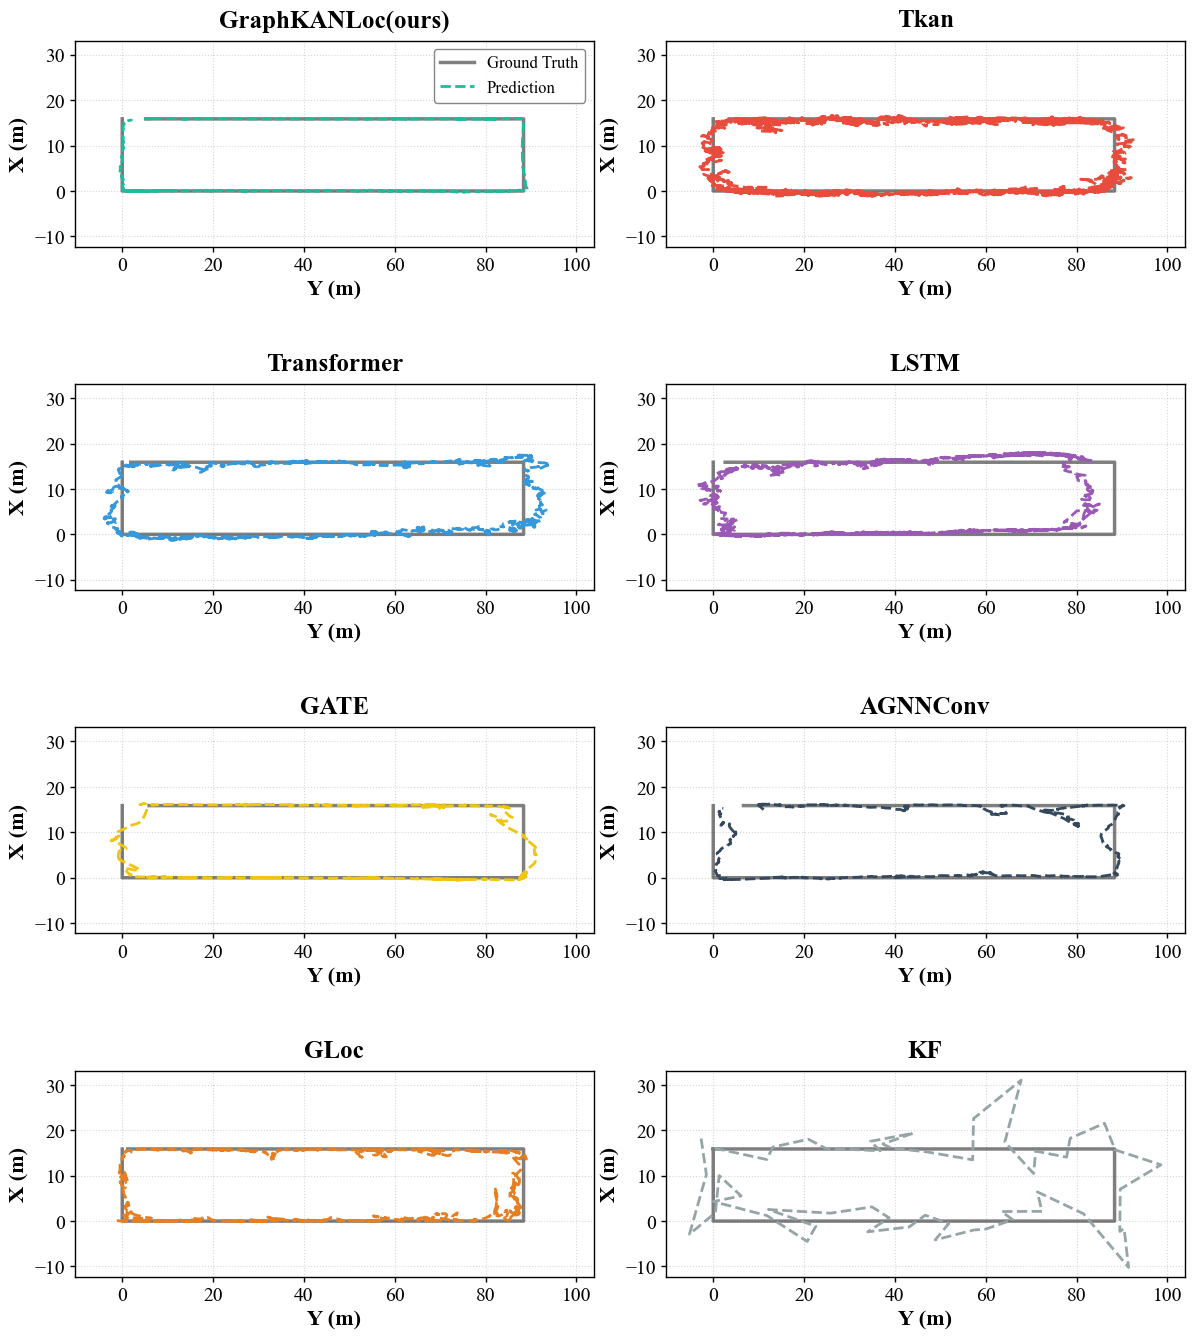

轨迹对比图已保存（紧凑版）。


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# 1. 全局绘图风格设置 (Nature Style)
# ==========================================
# 字体设置：优先使用 Times New Roman，没有则退回无衬线字体
plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.sans-serif'] = ['Arial']  # 如需 Arial 可取消注释
plt.rcParams['font.size'] = 12                 # 基础字号略微调大
plt.rcParams['axes.linewidth'] = 1             # 坐标轴线宽
plt.rcParams['xtick.major.width'] = 1          # 刻度线宽
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['legend.frameon'] = False         # 图例无边框

# ==========================================
# 2. 数据准备 (Data Preparation)
# ==========================================
files = {
    "GraphKANLoc(ours)": "Gkan_Cheku.csv",
    "Tkan": "tkan_x_datasets.csv",
    "Transformer": "Transformer_Cheku.csv",
    "LSTM": "Naive_LSTM_cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "AGNNConv": "Zigbee_Cheku.csv",
    "GLoc": "GLoc_CheKu.csv",
    "KF": "KF_Cheku.csv"
}

data = {}
errors = {}

print("正在读取数据...")
for name, fpath in files.items():
    if os.path.exists(fpath):
        try:
            df = pd.read_csv(fpath)
            data[name] = df
            
            # 计算欧几里得误差
            px, py = df['Pred_X'], df['Pred_Y']
            tx, ty = df['True_X'], df['True_Y']
            error = np.sqrt((tx - px)**2 + (ty - py)**2)
            errors[name] = error
            print(f"  -> 已加载: {name} (样本数: {len(df)})")
        except Exception as e:
            print(f"  -> 读取错误 {name}: {e}")
    else:
        print(f"  -> 警告: 文件未找到 {fpath}")

# ==========================================
# 3. 颜色与线型配置 (Fresh Style)
# ==========================================
# 使用 Seaborn 的 "Set2" 或 "Paired" 等清新色盘，确保有足够的颜色
# 如果模型超过 8 个，Set2 会循环，这里我们组合一下以保证区分度
# 这是一个手动挑选的“清新且高对比”色盘 (8色)
fresh_palette = [
    '#1ABC9C', # 青绿 (GraphKANLoc)
    '#E74C3C', # 柔红
    '#3498DB', # 天蓝
    '#9B59B6', # 淡紫
    '#F1C40F', # 向日葵黄
    '#34495E', # 深灰蓝
    '#E67E22', # 橘色
    '#95A5A6'  # 灰
]
# 如果模型数量多于预设颜色，自动扩展
if len(data) > len(fresh_palette):
    fresh_palette = sns.color_palette("husl", len(data))

# 线型列表，用于 CDF 图区分
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (1, 1))]

# ==========================================
# 4. 绘制 CDF 图 (CDF Plot)
# ==========================================
if errors:
    plt.figure(figsize=(7, 6))

    # 找到全局最大误差，用于延伸线条
    all_max_errors = [np.max(err) for err in errors.values() if len(err) > 0]
    global_max_error = max(all_max_errors) if all_max_errors else 0

    for i, (name, err) in enumerate(errors.items()):
        if len(err) == 0: continue
        
        # 数据处理
        sorted_error = np.sort(err)
        yvals = np.arange(1, len(sorted_error) + 1) / float(len(sorted_error))
        
        # 延伸
        sorted_error = np.append(sorted_error, global_max_error)
        yvals = np.append(yvals, 1.0)
        
        # 绘图
        current_color = fresh_palette[i % len(fresh_palette)]
        current_ls = linestyles[i % len(linestyles)]
        
        plt.plot(sorted_error, yvals, 
                 label=name, 
                 color=current_color, 
                 linestyle=current_ls, 
                 linewidth=2.5, 
                 alpha=0.9)

    plt.xlabel('Localization Error (m)', fontsize=14, fontweight='bold')
    plt.ylabel('CDF', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='lower right', fontsize=10)
    plt.xlim(0, global_max_error)
    plt.ylim(0, 1.02)
    plt.tight_layout()
    plt.savefig('CDF_Comparison_Nature_Final.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("CDF 图已保存。")

# ==========================================
# 5. 绘制轨迹对比图 (Trajectory Plot) 
#    配置：X/Y互换, 2列4行, 固定大小, 大字体
# ==========================================
if data:
    # --- 步骤 A: 计算全局统一的坐标轴范围 (基于原始数据) ---
    all_x_values = []
    all_y_values = []

    for df in data.values():
        all_x_values.extend(df['True_X'].values)
        all_x_values.extend(df['Pred_X'].values)
        all_y_values.extend(df['True_Y'].values)
        all_y_values.extend(df['Pred_Y'].values)

    if all_x_values and all_y_values:
        # 获取原始数据的极值
        x_min, x_max = min(all_x_values), max(all_x_values)
        y_min, y_max = min(all_y_values), max(all_y_values)

        # 加 5% 留白
        x_margin = (x_max - x_min) * 0.05
        y_margin = (y_max - y_min) * 0.05

        # 原始数据的范围 (用于后续限制)
        data_x_limit = (x_min - x_margin, x_max + x_margin)
        data_y_limit = (y_min - y_margin, y_max + y_margin)
    else:
        # 默认值防止空数据报错
        data_x_limit = (0, 10)
        data_y_limit = (0, 10)

    # # --- 绘图布局配置 ---
    # num_plots = len(data)
    # cols = 2  # 固定为 2 列
    # rows = (num_plots + cols - 1) // cols # 计算行数 (例如 8/2 = 4行)

    # # 调整画布大小
    # # 宽度：每列 6 英寸 -> 总宽 12
    # # 高度：每行 5 英寸 -> 总高 20 (因为有 4 行，需要很高)
    # fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    # axes = axes.flatten()

    # for i, (name, df) in enumerate(data.items()):
    #     ax = axes[i]
    #     current_color = fresh_palette[i % len(fresh_palette)]
        
    #     # --- 核心修改：交换 X 和 Y 进行绘制 ---
    #     # 原本是 plot(x, y)，现在变成 plot(y, x)
    #     # 含义：横轴显示 Y坐标，纵轴显示 X坐标
        
    #     # 1. 绘制真实轨迹 (黑色实线)
    #     ax.plot(df['True_Y'], df['True_X'], 'k-', label='Ground Truth', linewidth=2.5, alpha=0.5)
        
    #     # 2. 绘制预测轨迹 (彩色虚线)
    #     ax.plot(df['Pred_Y'], df['Pred_X'], '--', label='Prediction', linewidth=2, color=current_color)
        
    #     # --- 样式与标签 ---
    #     ax.set_title(name, fontsize=18, fontweight='bold', pad=12) # 标题大一点
        
    #     # 标签互换：横轴是Y，纵轴是X
    #     ax.set_xlabel('Y (m)', fontsize=16, fontweight='bold')
    #     ax.set_ylabel('X (m)', fontsize=16, fontweight='bold')
        
    #     # 刻度文字调大
    #     ax.tick_params(axis='both', which='major', labelsize=14)
        
    #     # --- 限制范围互换 ---
    #     # 横轴(现在是Y数据) -> 使用 Y 的范围
    #     ax.set_xlim(data_y_limit)
    #     # 纵轴(现在是X数据) -> 使用 X 的范围
    #     ax.set_ylim(data_x_limit)
        
    #     # 强制比例一致 (Box模式，形状固定)
    #     ax.set_aspect('equal', adjustable='box')
        
    #     ax.grid(True, linestyle=':', alpha=0.5)
        
    #     # 仅在第一个图显示图例
    #     if i == 0:
    #         ax.legend(fontsize=12, loc='upper right', frameon=True, framealpha=0.95, edgecolor='gray')

    # # 隐藏多余的空白子图 (如果有)
    # for j in range(i + 1, len(axes)):
    #     axes[j].axis('off')

    # # 调整间距
    # plt.subplots_adjust(wspace=0.15, hspace=0.25)
    
    # plt.tight_layout()
    # plt.savefig('Trajectory_Comparison_Swapped_Final.png', dpi=300, bbox_inches='tight')
    # plt.show()
    # print("轨迹对比图已保存。")
    # --- 绘图布局配置 ---
    num_plots = len(data)
    cols = 2  # 固定为 2 列
    rows = (num_plots + cols - 1) // cols 

    # 【修改点 1】: 调整 figsize
    # 之前是 5 * rows，现在改为 4 * rows (稍微压扁一点画布高度)
    # 这样可以迫使行与行之间靠得更近，消除多余的垂直空白
    fig, axes = plt.subplots(rows, cols, figsize=(12, 3.5 * rows))
    axes = axes.flatten()

    for i, (name, df) in enumerate(data.items()):
        ax = axes[i]
        current_color = fresh_palette[i % len(fresh_palette)]
        
        # 绘制真实轨迹 (黑色实线)
        ax.plot(df['True_Y'], df['True_X'], 'k-', label='Ground Truth', linewidth=2.5, alpha=0.5)
        
        # 绘制预测轨迹 (彩色虚线)
        ax.plot(df['Pred_Y'], df['Pred_X'], '--', label='Prediction', linewidth=2, color=current_color)
        
        # 样式与标签
        ax.set_title(name, fontsize=18, fontweight='bold', pad=10) # pad改小一点让标题离图近点
        
        ax.set_xlabel('Y (m)', fontsize=16, fontweight='bold')
        ax.set_ylabel('X (m)', fontsize=16, fontweight='bold')
        ax.tick_params(axis='both', which='major', labelsize=14)
        
        # 限制范围
        ax.set_xlim(data_y_limit)
        ax.set_ylim(data_x_limit)
        ax.set_aspect('equal', adjustable='box') 
        ax.grid(True, linestyle=':', alpha=0.5)
        
        if i == 0:
            ax.legend(fontsize=12, loc='upper right', frameon=True, framealpha=0.95, edgecolor='gray')

    # 隐藏多余子图
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # 【修改点 2】: 调整间距参数
    # hspace 从 0.25 改为 0.1 (或者 0.05)，这一步直接缩减间隔
    # wspace 左右间距保持 0.15
    plt.subplots_adjust(wspace=0.15, hspace=0.1)
    
    # 注意：使用 tight_layout 有时会覆盖 subplots_adjust，
    # 但我们可以给 rect 参数留出空间，或者直接信任 subplots_adjust。
    # 这里我们使用 pad=0.5 让 tight_layout 算得更紧凑一点
    plt.tight_layout() 
    
    # 如果 tight_layout 导致间距还是太大，可以在 tight_layout 之后再次强制覆盖
    # plt.subplots_adjust(hspace=0.05) 

    plt.savefig('Trajectory_Comparison_Compact.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("轨迹对比图已保存（紧凑版）。")

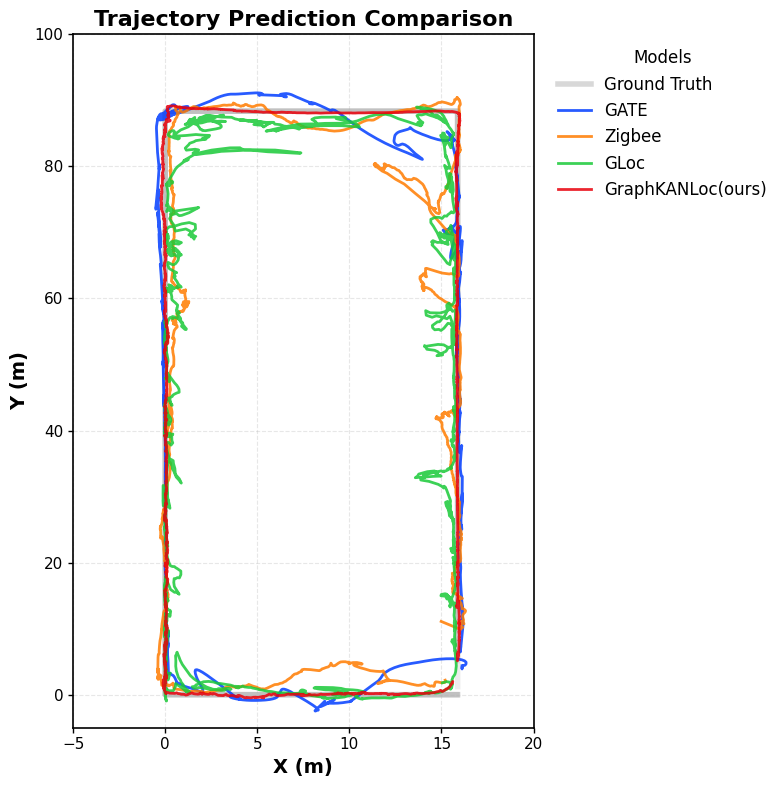

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# 1. 样式设置
# ==========================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['legend.frameon'] = False

# ==========================================
# 2. 数据准备
# ==========================================
all_files = {
    "GraphKANLoc(ours)": "Gkan_Cheku.csv",
    "Tkan": "tkan_x_datasets.csv",
    "Transformer": "Transformer_Cheku.csv",
    "LSTM": "Naive_LSTM_cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "Zigbee": "Zigbee_Cheku.csv",
    "GLoc": "GLoc_CheKu_Predictions.csv"
}

# 指定要画的模型
selected_models = ["GATE", "Zigbee", "GLoc", "GraphKANLoc(ours)"]

data = {}
for name in selected_models:
    fpath = all_files.get(name)
    if fpath and os.path.exists(fpath):
        data[name] = pd.read_csv(fpath)

# ==========================================
# 3. 绘图 (全实线版)
# ==========================================
plt.figure(figsize=(8, 8))

# 定义颜色 (Bright 风格)
colors = sns.color_palette("bright", len(selected_models))

# --- 3.1 绘制 Ground Truth (背景) ---
for name in selected_models:
    if name in data:
        df = data[name]
        # 灰色、加粗、半透明
        plt.plot(df['True_X'], df['True_Y'], 
                 color='gray', linewidth=4, alpha=0.15, zorder=1)

# 添加 Ground Truth 图例
plt.plot([], [], color='gray', linewidth=4, alpha=0.3, label='Ground Truth')

# --- 3.2 绘制 Predictions (前景) ---
for i, name in enumerate(selected_models):
    if name in data:
        df = data[name]
        
        plt.plot(df['Pred_X'], df['Pred_Y'], 
                 color=colors[i], 
                 linestyle='-',  # <--- 全部强制为实线
                 linewidth=2.0, 
                 alpha=0.85,     # 稍微透明一点点，方便看重叠部分
                 label=name, 
                 zorder=2 + i)

# ==========================================
# 4. 布局美化
# ==========================================
plt.xlabel('X (m)', fontsize=14, fontweight='bold')
plt.ylabel('Y (m)', fontsize=14, fontweight='bold')
plt.title('Trajectory Prediction Comparison', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)
# plt.axis('equal') 
plt.xlim(-5, 20)  
plt.ylim(-5, 100)
# 图例位置
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', 
           fontsize=12, title='Models', title_fontsize=12)

plt.tight_layout()
plt.savefig('Trajectory_Selected_Models_Solid.png', dpi=300, bbox_inches='tight')
plt.show()

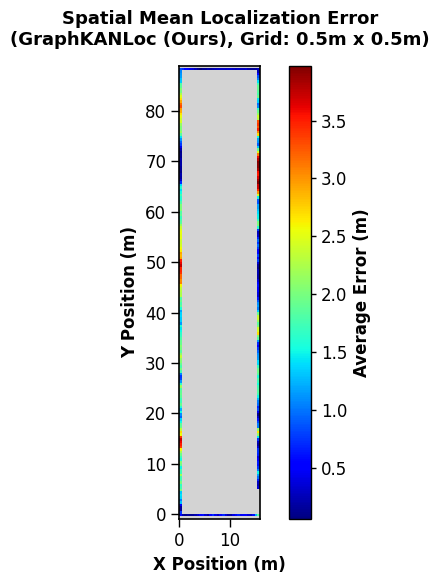

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import os

# ==========================================
# 1. 配置与数据加载
# ==========================================
# 设置 Nature 风格字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

# 文件路径 (请修改为您想画的那个模型，通常是效果最好的那个)
file_path = "Gkan_Cheku.csv" 
model_name = "GraphKANLoc (Ours)"

# 网格大小 (单位: 米) -> 对应图片中的 0.5m x 0.5m
grid_size = 0.5 

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    
    # 提取数据
    tx, ty = df['True_X'].values, df['True_Y'].values
    px, py = df['Pred_X'].values, df['Pred_Y'].values
    
    # 计算每个点的欧几里得误差
    errors = np.sqrt((tx - px)**2 + (ty - py)**2)
    
    # ==========================================
    # 2. 核心计算: 网格化统计 (Binning)
    # ==========================================
    # 自动确定场地范围 (也可以手动指定，如 x_max=30)
    x_min, x_max = np.floor(tx.min()), np.ceil(tx.max())
    y_min, y_max = np.floor(ty.min()), np.ceil(ty.max())
    
    # 生成网格的边缘
    x_bins = np.arange(x_min, x_max + grid_size, grid_size)
    y_bins = np.arange(y_min, y_max + grid_size, grid_size)
    
    # 使用 scipy 进行二维统计
    # statistic='mean' 表示计算落入该网格内所有点的【平均误差】
    ret = binned_statistic_2d(tx, ty, errors, statistic='mean', bins=[x_bins, y_bins])
    
    # 获取统计结果矩阵 (注意：需要转置 .T 才能对应 imshow 的坐标系)
    heatmap_matrix = ret.statistic.T
    
    # ==========================================
    # 3. 绘图 (Heatmap)
    # ==========================================
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # 设置背景色为灰色 (代表没有数据的区域，即图片中的灰色格子)
    ax.set_facecolor('#D3D3D3') # Light Gray
    
    # 绘制热力图
    # cmap='jet' 或 'turbo' 对应图片中的 蓝->红 效果
    # origin='lower' 确保坐标原点在左下角
    # extent 确保坐标轴显示真实的米数，而不是数组下标
    im = ax.imshow(heatmap_matrix, 
                   origin='lower',
                   extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]],
                   cmap='jet', 
                   aspect='equal',
                   interpolation='nearest') # nearest 确保显示为清晰的方格
    
    # 添加 Colorbar (颜色条)
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Average Error (m)', fontsize=12, fontweight='bold')
    cbar.outline.set_linewidth(1) # 颜色条边框
    
    # ==========================================
    # 4. 细节美化
    # ==========================================
    ax.set_xlabel('X Position (m)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y Position (m)', fontsize=12, fontweight='bold')
    ax.set_title(f'Spatial Mean Localization Error\n({model_name}, Grid: {grid_size}m x {grid_size}m)', 
                 fontsize=13, fontweight='bold', pad=15)
    
    # 设置刻度朝外
    ax.tick_params(direction='out', length=6, width=1)
    
    # 如果想限制显示的坐标范围，可以在这里设置
    # ax.set_xlim(0, 30)
    # ax.set_ylim(0, 30)

    plt.tight_layout()
    plt.savefig('Spatial_Error_Heatmap_Nature.png', dpi=300, bbox_inches='tight')
    plt.show()
    
else:
    print(f"Error: File {file_path} not found.")

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


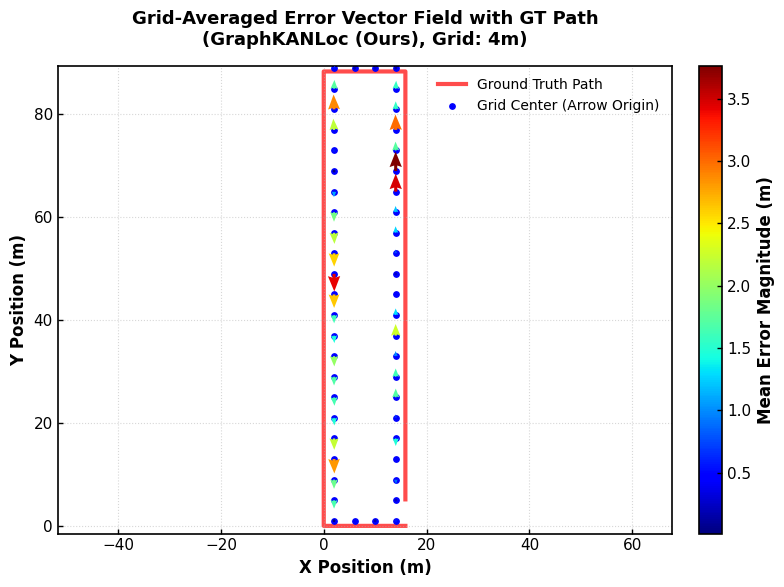

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import os

# ==========================================
# 1. 设置 Nature 风格
# ==========================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2

# ==========================================
# 2. 数据准备与参数配置
# ==========================================
file_path = "Gkan_Cheku.csv"  # 替换您的文件路径
model_name = "GraphKANLoc (Ours)"
grid_size = 4 # 网格大小

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    tx, ty = df['True_X'].values, df['True_Y'].values
    px, py = df['Pred_X'].values, df['Pred_Y'].values

    # --- 核心步骤：计算原始的误差向量 (u, v) ---
    u_raw = px - tx
    v_raw = py - ty

    # ==========================================
    # 3. 网格化计算平均向量
    # ==========================================
    # 确定网格范围
    x_min, x_max = np.floor(tx.min()), np.ceil(tx.max())
    y_min, y_max = np.floor(ty.min()), np.ceil(ty.max())
    x_bins = np.arange(x_min, x_max + grid_size, grid_size)
    y_bins = np.arange(y_min, y_max + grid_size, grid_size)

    # 分别统计每个网格内的平均 u 分量和平均 v 分量
    u_stat = binned_statistic_2d(tx, ty, u_raw, statistic='mean', bins=[x_bins, y_bins])
    v_stat = binned_statistic_2d(tx, ty, v_raw, statistic='mean', bins=[x_bins, y_bins])

    # 获取网格化的 U 和 V 矩阵 (需要转置)
    U_grid = u_stat.statistic.T
    V_grid = v_stat.statistic.T

    # 计算每个网格平均向量的模长 (用于上色)
    Magnitude_grid = np.sqrt(U_grid**2 + V_grid**2)
    Magnitude_grid = np.nan_to_num(Magnitude_grid)

    # 计算网格中心点坐标 (作为箭头的起点)
    x_centers = (x_bins[:-1] + x_bins[1:]) / 2
    y_centers = (y_bins[:-1] + y_bins[1:]) / 2
    X_grid, Y_grid = np.meshgrid(x_centers, y_centers)

    # ==========================================
    # 4. 绘制整齐的向量场 (已修改)
    # ==========================================
    fig, ax = plt.subplots(figsize=(8, 6))

    # >>>>> 新增部分：绘制 Ground Truth 完整路径 (背景) <<<<<
    # zorder=1 确保它在最底层，不会遮挡箭头
    # 使用灰色、较粗的线条、半透明
    ax.plot(tx, ty, color='red', linewidth=3, alpha=0.7, label='Ground Truth Path', zorder=1)
    # >>>>> 结束 <<<<<

    # 4.1 绘制网格基点 (蓝色小点)
    mask = ~np.isnan(U_grid)
    # 修改了 label，说明这些点是网格中心（箭头的起点）
    ax.scatter(X_grid[mask], Y_grid[mask], c='blue', s=15, zorder=2, label='Grid Center (Arrow Origin)')

    # 4.2 绘制向量箭头
    U_masked = np.ma.masked_where(np.isnan(U_grid), U_grid)
    V_masked = np.ma.masked_where(np.isnan(V_grid), V_grid)
    Mag_masked = np.ma.masked_where(np.isnan(Magnitude_grid), Magnitude_grid)

    q = ax.quiver(X_grid, Y_grid, U_masked, V_masked, Mag_masked,
                   cmap='jet',
                   angles='xy', scale_units='xy', scale=1,
                   width=0.005, headwidth=4, headlength=5,
                   zorder=3)

    # ==========================================
    # 5. 细节美化
    # ==========================================
    cbar = plt.colorbar(q, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Mean Error Magnitude (m)', fontsize=12, fontweight='bold')

    ax.set_title(f'Grid-Averaged Error Vector Field with GT Path\n({model_name}, Grid: {grid_size}m)',
                 fontsize=13, fontweight='bold', pad=15)
    ax.set_xlabel('X Position (m)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y Position (m)', fontsize=12, fontweight='bold')

    ax.axis('equal')
    ax.grid(True, linestyle=':', alpha=0.5, zorder=0)
    # 更新图例以显示路径
    ax.legend(loc='upper right', fontsize=10)
    
    ax.set_xlim(x_min - 0.5, x_max + 0.5)
    ax.set_ylim(y_min - 0.5, y_max + 0.5)

    plt.tight_layout()
    plt.savefig('Grid_Vector_Field_with_GTPath_Nature.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print(f"Error: File {file_path} not found.")

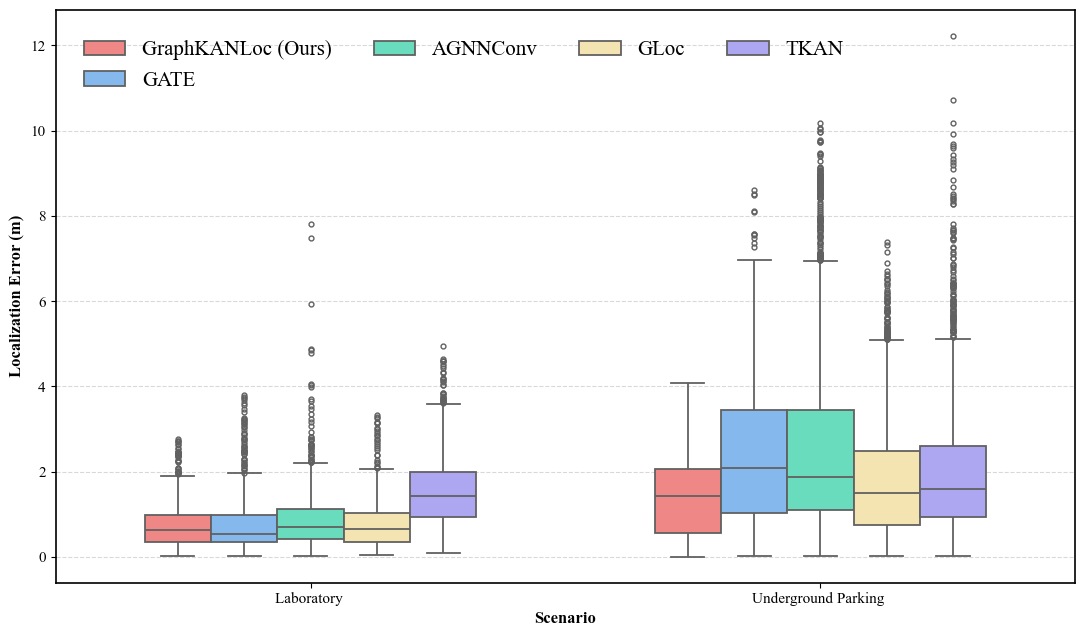

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# 1. 样式设置 (Nature 风格)
# ==========================================
plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

# ==========================================
# 2. 数据准备与整合
# ==========================================
# 定义场景和对应的文件路径
# 请将这里替换为您真实的 CSV 文件路径

# 结构: { "场景名": { "模型名": "文件路径" } }
scenarios_config = {
    "Laboratory ": {
        "GraphKANLoc (Ours)": "../Lab/Gkan_Lab.csv",
        "GATE": "../Lab/GATE_Lab.csv",
        "AGNNConv": "../Lab/Zigbee_Lab.csv",
        "GLoc": "../Lab/GLoc_Final_Gloc_Zoulang.csv",
        "TKAN":"../Lab/tkan_zoulang.csv"
    },
    # 假设这是第二个场景的数据 (如果没有，您可以先注释掉或复制一份假装是第二个场景)
    "Underground Parking ": {
        "GraphKANLoc (Ours)": "Gkan_Cheku.csv",
        "GATE": "GATE_Cheku.csv",
        "AGNNConv": "Zigbee_Cheku.csv",
        "GLoc": "GLoc_CheKu.csv",
        "TKAN":"tkan_x_datasets.csv"
    }
}

all_data = []

for scene_name, models in scenarios_config.items():
    for model_name, fpath in models.items():
        if os.path.exists(fpath):
            df = pd.read_csv(fpath)
            
            # 计算误差
            error = np.sqrt((df['True_X'] - df['Pred_X'])**2 + (df['True_Y'] - df['Pred_Y'])**2)
            
            # 如果是演示用的第二个场景，我手动加一点随机噪声，让图看起来不一样
            if "GUnderground Parking" in scene_name:
                error = error * 1.2 + 0.1  # 模拟车库环境误差更大
            
            # 构建 DataFrame 片段
            temp_df = pd.DataFrame({
                'Error': error,
                'Model': model_name,
                'Scenario': scene_name
            })
            all_data.append(temp_df)

# 合并所有数据
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
else:
    print("No data loaded. Please check file paths.")
    final_df = pd.DataFrame()

# ==========================================
# 3. 绘制分组箱线图 (Grouped Boxplot) - 清新配色版
# ==========================================
if not final_df.empty:
    # 稍微调大一点画布，让画面更舒展
    plt.figure(figsize=(11, 6.5))
    
    # -------------------------------------------------
    # 【颜色配置区 (全新清新风格)】
    # -------------------------------------------------
    
    # 【选项 A: Seaborn Set2 (最为推荐)】
    # 特点：这是学术界公认的“小清新”配色，饱和度适中，柔和且区分度好。
    # 颜色：淡绿、柔橘、灰蓝、柔粉
    # my_palette = sns.color_palette("Set2", n_colors=4)
    
    # 【选项 B: 现代扁平风 (Flat UI)】
    # 特点：源自现代UI设计，色彩明亮干净，非常适合屏幕展示，有一种科技清新感。
    # 颜色：青绿(Turquoise)、天蓝(Peter River)、柔紫(Amethyst)、向日葵黄(Sun Flower)
    my_palette = ['#ff7675', '#74b9ff', '#55efc4', '#ffeaa7', '#a29bfe']
    
    # 【选项 C: 森系薄荷风 (依然突出主角)】
    # 特点：如果您还是希望第一个模型（假设是您的模型）突出，但不想用刺眼的红色。
    # 思路：用亮眼的“薄荷绿”作为主角，其他对比模型使用低调的冷灰色系。
    # 颜色：薄荷绿(主角), 柔蓝, 柔紫, 灰蓝
    # my_palette = ['#00b894', '#74b9ff', '#a29bfe', '#b2bec3'] 

    # -------------------------------------------------

    # 绘图配置微调：为了配合清新风格，让线条更精致一点
    box_linewidth = 1.3  # 原1.5，稍微调细
    flier_size = 3.5     # 原4，离群点稍微调小，不抢视觉
    box_width = 0.65     # 原0.7，稍微窄一点点显得秀气

    ax = sns.boxplot(x='Scenario', y='Error', hue='Model', data=final_df,
                     palette=my_palette,
                     width=box_width,
                     linewidth=box_linewidth,
                     fliersize=flier_size,
                     showmeans=False)
    
    # ==========================================
    # 4. 细节美化 (风格配套调整)
    # ==========================================
    # 使用深灰色替代纯黑色字体，视觉更柔和
    text_color = "#000000" # 一种深灰蓝色

    # plt.title('Scenario-based Localization Error Comparison', fontsize=15, fontweight='bold', pad=15, color=text_color)
    plt.xlabel('Scenario', fontsize=12, fontweight='bold', color=text_color)
    plt.ylabel('Localization Error (m)', fontsize=12, fontweight='bold', color=text_color)
    
    # 网格线：颜色更淡，透明度更低，让背景更干净
    plt.grid(axis='y', linestyle='--', alpha=0.3, color='gray')
    
    # 调整坐标轴刻度颜色
    plt.tick_params(axis='both', colors=text_color)

    # 图例优化：去掉了边框 (frameon=False)，显得更现代
    # plt.legend(title='Models', fontsize=10, title_fontsize=11, 
    #            bbox_to_anchor=(1.015, 1), loc='upper left', 
    #            frameon=False, labelcolor=text_color)
    # 图例优化：放入图内 (顶部平铺)
    plt.legend(title='',              # 通常横排时不需要标题，或者保留 'Models'
               fontsize=15, 
               loc='upper center',    # 【修改点】放在顶部中间
               bbox_to_anchor=(0.4, 0.98), # 微调位置：(水平居中, 垂直稍微靠下一点点)
               ncol=4,                # 【关键点】设置为4列，让图例横着排开
               frameon=False,         # 横排通常不需要边框，显得更干净
               labelcolor=text_color)
    # 调整 Y 轴范围 (根据需要取消注释)
    # plt.ylim(0, 3.5)

    plt.tight_layout()
    # 保存文件名也改一下
    plt.savefig('Scenario_Boxplot_FreshStyle.png', dpi=300, bbox_inches='tight')
    plt.show()



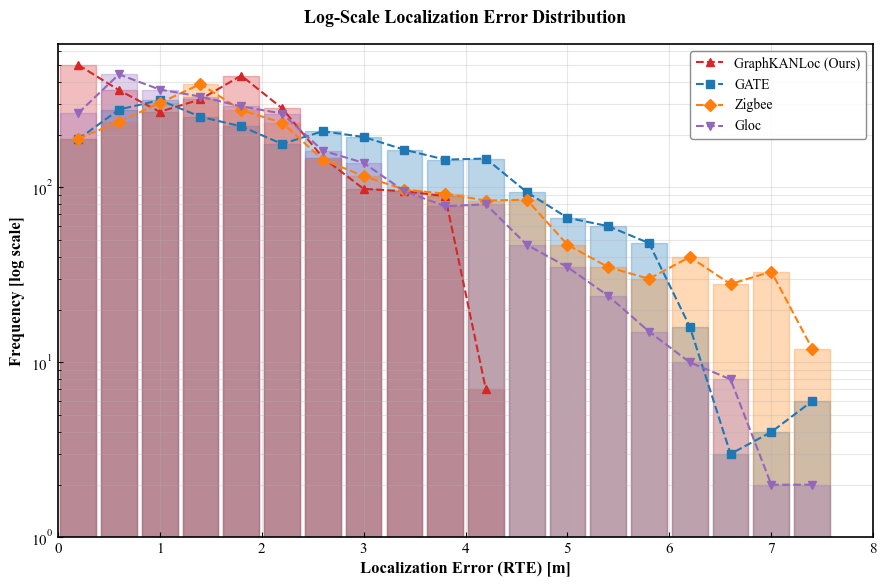

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ==========================================
# 1. 样式设置 (Nature 风格)
# ==========================================
plt.rcParams['font.family'] = 'Times new Roman'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# ==========================================
# 2. 数据准备
# ==========================================
files = {
    "GraphKANLoc (Ours)": "Gkan_Cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "Zigbee": "Zigbee_Cheku.csv",
    "Gloc": "GLoc_Cheku.csv"
}

rte_data = {}

for name, fpath in files.items():
    if os.path.exists(fpath):
        df = pd.read_csv(fpath)
        
        # --- 【修改点 1】计算 RTE (定位误差) ---
        # 公式: sqrt((Tx - Px)^2 + (Ty - Py)^2)
        diff_x = df['True_X'] - df['Pred_X']
        diff_y = df['True_Y'] - df['Pred_Y']
        error = np.sqrt(diff_x**2 + diff_y**2)
        
        rte_data[name] = error
    else:
        print(f"Warning: File {fpath} not found.")

# ==========================================
# 3. 绘图 (RTE 分布版)
# ==========================================
plt.figure(figsize=(9, 6))

# --- 定义颜色和标记 (去掉了 Ground-Truth，因为误差为0不画) ---
styles = {
    'GraphKANLoc (Ours)': {'color': '#D62728', 'marker': '^', 'facecolor': '#D62728', 'hatch': ''}, # 红
    'GATE':               {'color': '#1F77B4', 'marker': 's', 'facecolor': '#1F77B4', 'hatch': ''}, # 蓝
    'Zigbee':             {'color': '#FF7F0E', 'marker': 'D', 'facecolor': '#FF7F0E', 'hatch': ''}, # 橙
    'Gloc':               {'color': '#9467BD', 'marker': 'v', 'facecolor': '#9467BD', 'hatch': ''}  # 紫
}

# --- 【修改点 2】调整 Bin 的范围 ---
# 误差通常在 0-5米 或 0-10米 之间，这里设为 0-8米，步长0.5米
# 如果您的误差较大，请将 8 改为 15
bins = np.arange(0, 8, 0.4) 
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# 循环绘制
for name, data in rte_data.items():
    if len(data) == 0: continue
    
    style = styles.get(name, {'color': 'black', 'marker': 'x', 'facecolor': 'gray', 'hatch': ''})
    
    counts, _ = np.histogram(data, bins=bins)
    valid_mask = counts > 0
    
    # 1. 绘制柱状图 (Bar) - 半透明
    plt.bar(bin_centers, counts, width=0.35, # 柱子稍微细一点
            edgecolor=style['color'], 
            facecolor=style['facecolor'],
            alpha=0.3, # 透明度统一设为 0.3
            label=None) 

    # 2. 绘制折线 (Line) - 实线连接
    plt.plot(bin_centers[valid_mask], counts[valid_mask], 
             color=style['color'], 
             linestyle='--', 
             marker=style['marker'], 
             markersize=6, 
             label=name, 
             linewidth=1.5)

# ==========================================
# 4. 细节美化
# ==========================================
plt.yscale('log')  # 保持对数坐标，观察长尾分布(大误差出现的频率)

# 设置轴范围
plt.xlim(0, 8)     # 根据 bins 的最大值调整
plt.ylim(bottom=1) # Log 坐标下底限设为1，避免报错

# --- 【修改点 3】更新标签 ---
plt.xlabel('Localization Error (RTE) [m]', fontsize=12, fontweight='bold')
plt.ylabel('Frequency [log scale]', fontsize=12, fontweight='bold')
plt.title('Log-Scale Localization Error Distribution', fontsize=13, fontweight='bold', pad=15)

plt.grid(True, which="both", ls="-", alpha=0.3)
plt.legend(loc='upper right', fontsize=10, frameon=True, framealpha=0.9, edgecolor='gray')

plt.tight_layout()
plt.savefig('RTE_Distribution_Log.png', dpi=300, bbox_inches='tight')
plt.show()

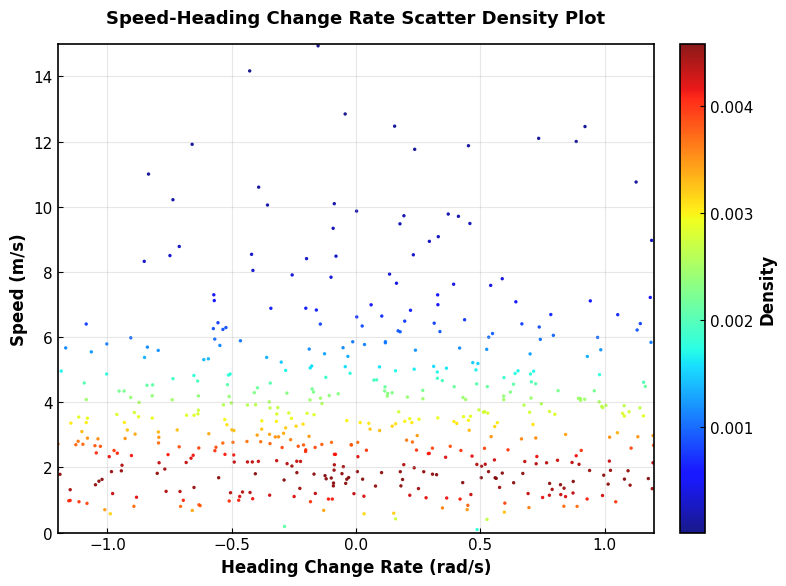

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import os

# ==========================================
# 1. 样式设置 (Nature 风格)
# ==========================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# ==========================================
# 2. 核心计算函数
# ==========================================
def calculate_dynamics(x, y, dt=1.0):
    """
    根据坐标轨迹计算 速度 和 航向变化率
    x, y: 坐标数组
    dt: 采样时间间隔 (秒)
    """
    x = np.array(x)
    y = np.array(y)
    
    # 1. 计算一阶差分 (位移)
    dx = np.diff(x)
    dy = np.diff(y)
    
    # 2. 计算瞬时速度 (Speed)
    # v = sqrt(dx^2 + dy^2) / dt
    speeds = np.sqrt(dx**2 + dy**2) / dt
    
    # 3. 计算航向角 (Heading)
    # 使用 arctan2 计算每一步的方向 (-pi 到 pi)
    headings = np.arctan2(dy, dx)
    
    # 4. 计算航向角变化率 (Heading Change Rate)
    # diff_heading = heading[i+1] - heading[i]
    d_heading = np.diff(headings)
    
    # 【关键】处理角度跳变 (Wrap-around handling)
    # 例如从 3.13 变到 -3.13，实际只转了一点点，但数值差了 2*pi
    d_heading = np.where(d_heading > np.pi, d_heading - 2*np.pi, d_heading)
    d_heading = np.where(d_heading < -np.pi, d_heading + 2*np.pi, d_heading)
    
    # 转为角速度 (rad/s)
    heading_rates = d_heading / dt
    
    # 由于计算差分会让数组长度变短
    # speeds 长度是 N-1, heading_rates 长度是 N-2
    # 我们截取 speeds 的前 N-2 个数据以对齐
    return speeds[:-1], heading_rates

# ==========================================
# 3. 数据准备
# ==========================================
file_path = "Gkan_Cheku.csv" # 请替换为您的文件路径
# dt 是很重要参数！如果您的数据是 0.1秒 采集一次，请改为 0.1
dt = 0.05   #20hz

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    
    # 使用预测轨迹进行分析 (或者使用 True_X/Y 分析真值)
    px, py = df['Pred_X'].values, df['Pred_Y'].values
    
    # 计算动力学参数
    speed, turn_rate = calculate_dynamics(px, py, dt=dt)
    
    # ==========================================
    # 4. 计算密度 (Density Estimation)
    # ==========================================
    # 堆叠数据用于 KDE 计算
    xy = np.vstack([turn_rate, speed])
    
    # 计算高斯核密度 (可能需要几秒钟)
    z = gaussian_kde(xy)(xy)
    
    # 按密度排序，确保高密度的红点画在最上面
    idx = z.argsort()
    x_plot, y_plot, z_plot = turn_rate[idx], speed[idx], z[idx]

    # ==========================================
    # 5. 绘图 (Scatter Density Plot)
    # ==========================================
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # 绘制散点
    # c=z_plot: 根据密度上色
    # cmap='jet': 蓝->红 颜色映射 (对应您图片中的风格)
    # s=5: 点的大小
    sc = ax.scatter(x_plot, y_plot, c=z_plot, s=6, cmap='jet', edgecolor='none', alpha=0.9)
    
    # 添加颜色条
    cbar = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Density', fontsize=12, fontweight='bold')
    
    # ==========================================
    # 6. 细节美化
    # ==========================================
    ax.set_title('Speed-Heading Change Rate Scatter Density Plot', fontsize=13, fontweight='bold', pad=15)
    ax.set_xlabel('Heading Change Rate (rad/s)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Speed (m/s)', fontsize=12, fontweight='bold')
    
    # 设置坐标范围 (参考您的样图，或者自动调整)
    # 样图 X 轴大约是 -1.2 到 1.2
    # 样图 Y 轴大约是 0 到 15
    ax.set_xlim(-1.2, 1.2) 
    ax.set_ylim(0, 15)
    
    ax.grid(True, linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('Speed_Heading_Density_Plot.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print(f"Error: File {file_path} not found.")

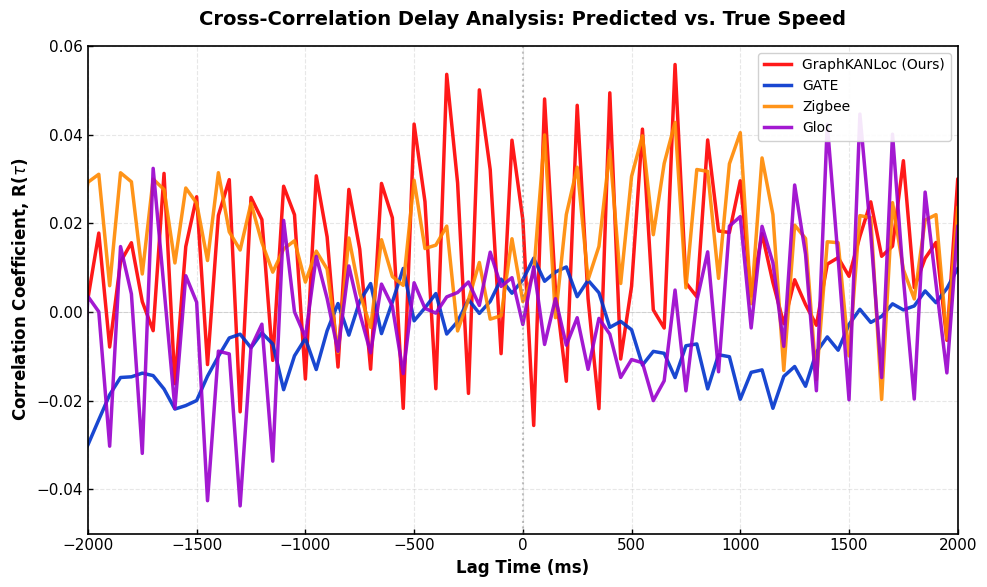

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os

# ==========================================
# 1. 样式设置 (Nature 风格)
# ==========================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# ==========================================
# 2. 核心计算函数
# ==========================================
def calculate_speed(x, y, dt):
    """计算速度序列"""
    dx = np.diff(x)
    dy = np.diff(y)
    dist = np.sqrt(dx**2 + dy**2)
    speed = dist / dt
    return speed

def compute_cross_correlation(v_true, v_pred, dt):
    """
    计算归一化互相关系数及对应的时间滞后
    """
    # 1. 标准化信号 (减均值，除标准差) -> 得到相关系数 [-1, 1]
    if np.std(v_pred) == 0: # 防止除以0
        return np.zeros(len(v_true)), np.zeros(len(v_true))
        
    v_true_norm = (v_true - np.mean(v_true)) / (np.std(v_true) * len(v_true))
    v_pred_norm = (v_pred - np.mean(v_pred)) / np.std(v_pred)
    
    # 2. 计算互相关
    corr = signal.correlate(v_true_norm, v_pred_norm, mode='full')
    
    # 3. 生成滞后轴 (Lags)
    lags = signal.correlation_lags(len(v_true), len(v_pred), mode='full')
    
    # 转换为毫秒 (ms)
    lags_ms = lags * dt * 1000 
    
    return lags_ms, corr

# ==========================================
# 3. 数据准备
# ==========================================
files = {
    "GraphKANLoc (Ours)": "Gkan_Cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "Zigbee": "Zigbee_Cheku.csv",
    "Gloc": "GLoc_Cheku.csv"
}

# 采样时间间隔 (秒)。请根据实际情况修改。
dt = 0.05 

results = {}

for name, fpath in files.items():
    if os.path.exists(fpath):
        df = pd.read_csv(fpath)
        
        # 1. 计算速度
        v_true = calculate_speed(df['True_X'], df['True_Y'], dt)
        v_pred = calculate_speed(df['Pred_X'], df['Pred_Y'], dt)
        
        # 2. 计算互相关
        lags, r = compute_cross_correlation(v_true, v_pred, dt)
        
        # 3. 找到峰值点 (Peak)
        if len(r) > 0:
            peak_idx = np.argmax(r)
            peak_lag = lags[peak_idx]
            peak_val = r[peak_idx]
            
            results[name] = {
                'lags': lags,
                'r': r,
                'peak_lag': peak_lag,
                'peak_val': peak_val
            }
    else:
        print(f"Warning: File {fpath} not found.")

# ==========================================
# 4. 绘图 (扩展颜色版)
# ==========================================
plt.figure(figsize=(10, 6)) # 稍微加宽一点

# ---【关键修改】颜色配置 (对应4个模型) ---
# 使用高对比度配色，确保每个模型清晰可见
colors = {
    "GraphKANLoc (Ours)": '#FF0000', # 正红 (Ours)
    "GATE":               '#0033CC', # 宝蓝
    "Zigbee":             '#FF8800', # 亮橙
    "Gloc":               '#9900CC'  # 紫罗兰
}

# 用于错开标注文本的计数器，防止文字重叠
text_offset_counter = 0

for name, data in results.items():
    lags = data['lags']
    r = data['r']
    peak_lag = data['peak_lag']
    peak_val = data['peak_val']
    
    # 获取颜色，如果没找到则默认灰色
    color = colors.get(name, '#333333')
    
    # 4.1 绘制曲线
    plt.plot(lags, r, color=color, linewidth=2.5, label=name, alpha=0.9)
    
    # 4.2 绘制峰值点和垂直虚线
    plt.plot(peak_lag, peak_val, marker='o', color=color, markersize=8, zorder=5)
    plt.vlines(peak_lag, 0, peak_val, color=color, linestyle='--', alpha=0.5)
    
    # 4.3 添加文本标注 (Peak Annotate)
    # 格式: "Model: R=0.95"
    # 为了防止4个模型的文字挤在一起，我们交替调整文字的高度位置
    label_text = f"Peak: R={peak_val:.2f}"
    
    # 简单的避让逻辑：根据 lag 的正负和计数器来决定文字位置
    if peak_lag >= 0:
        xytext_offset = (15, 5 + text_offset_counter * 15)
    else:
        xytext_offset = (-100, 5 + text_offset_counter * 15)
    
    # 每次循环改变一下高度偏移
    text_offset_counter = (text_offset_counter + 1) % 2 
    
    plt.annotate(label_text, 
                 xy=(peak_lag, peak_val), 
                 xytext=xytext_offset,
                 textcoords='offset points',
                 fontsize=9,
                 fontweight='bold',
                 color=color,
                 arrowprops=dict(arrowstyle="-", color=color, alpha=0.6))

# ==========================================
# 5. 细节美化
# ==========================================
plt.title('Cross-Correlation Delay Analysis: Predicted vs. True Speed', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Lag Time (ms)', fontsize=12, fontweight='bold')
plt.ylabel('Correlation Coefficient, R($\\tau$)', fontsize=12, fontweight='bold')

# 设置 X 轴范围 (根据您的 dt 大小调整)
# 建议范围大一点，确保能看到所有波形
plt.xlim(-2000, 2000) 
plt.ylim(-0.05, 0.06)

# 添加 0ms 基准线
plt.axvline(0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5) # 加粗一点基准线
plt.axhline(0, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right', fontsize=10, frameon=True, framealpha=0.9)

plt.tight_layout()
plt.savefig('CrossCorrelation_Delay_4Models.png', dpi=300, bbox_inches='tight')
plt.show()

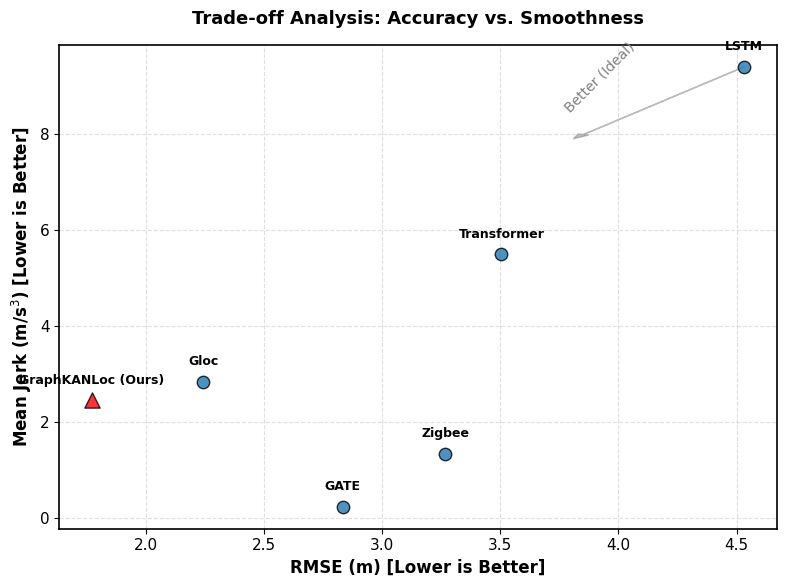

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ==========================================
# 1. 样式设置
# ==========================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.2

# ==========================================
# 2. 核心计算函数
# ==========================================
def calculate_metrics(df, dt=0.5):
    # 1. 计算 RMSE
    error = np.sqrt((df['True_X'] - df['Pred_X'])**2 + (df['True_Y'] - df['Pred_Y'])**2)
    rmse = np.sqrt(np.mean(error**2))
    
    # 2. 计算 Mean Jerk (平均平滑度)
    pred_x = df['Pred_X'].values
    pred_y = df['Pred_Y'].values
    if len(pred_x) < 4: return rmse, 0
    
    # 三阶差分求 Jerk
    jx = np.diff(pred_x, n=3) / (dt**3)
    jy = np.diff(pred_y, n=3) / (dt**3)
    jerk_mag = np.sqrt(jx**2 + jy**2)
    mean_jerk = np.mean(jerk_mag)
    
    return rmse, mean_jerk

# ==========================================
# 3. 数据准备
# ==========================================
# 请替换为您的真实文件
files = {
    "GraphKANLoc (Ours)": "Gkan_Cheku.csv",
    "GATE": "GATE_Cheku.csv",
    "Zigbee": "Zigbee_Cheku.csv",
    "Gloc": "GLoc_CheKu.csv",
    "Transformer": "Transformer_Cheku.csv",
    "LSTM": "Naive_LSTM_cheku.csv"
}

dt = 0.5 # 采样间隔
results = []

for name, fpath in files.items():
    if os.path.exists(fpath):
        df = pd.read_csv(fpath)
        rmse, jerk = calculate_metrics(df, dt)
        results.append({'name': name, 'rmse': rmse, 'jerk': jerk})
    else:
        print(f"Warning: {fpath} not found.")

# 转为 DataFrame 方便绘图
res_df = pd.DataFrame(results)

# ==========================================
# 4. 绘图: RMSE vs Jerk 散点图
# ==========================================
plt.figure(figsize=(8, 6))

# 定义颜色 (区分 Ours 和 Others)
colors = ['red' if 'Ours' in r['name'] else 'blue' for _, r in res_df.iterrows()]
sizes = [150 if 'Ours' in r['name'] else 80 for _, r in res_df.iterrows()]
markers = ['^' if 'Ours' in r['name'] else 'o' for _, r in res_df.iterrows()]

for i, row in res_df.iterrows():
    plt.scatter(row['rmse'], row['jerk'], 
                color='red' if 'Ours' in row['name'] else '#1f77b4', 
                s=120 if 'Ours' in row['name'] else 80,
                marker='^' if 'Ours' in row['name'] else 'o',
                edgecolor='black', alpha=0.8, zorder=3)
    
    # 添加文字标注 (自动避让稍微有点难，这里用简单的偏移)
    plt.text(row['rmse'], row['jerk'] + (max(res_df['jerk'])*0.03), 
             row['name'], fontsize=9, ha='center', va='bottom', fontweight='bold')

# 绘制“理想方向”箭头
plt.arrow(max(res_df['rmse']), max(res_df['jerk']), 
          -max(res_df['rmse'])*0.15, -max(res_df['jerk'])*0.15, 
          head_width=0.05, head_length=0.1, fc='gray', ec='gray', alpha=0.5)
plt.text(max(res_df['rmse'])*0.9, max(res_df['jerk'])*0.9, "Better (Ideal)", 
         color='gray', fontsize=10, rotation=45, ha='right')

plt.title('Trade-off Analysis: Accuracy vs. Smoothness', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('RMSE (m) [Lower is Better]', fontsize=12, fontweight='bold')
plt.ylabel('Mean Jerk (m/s$^3$) [Lower is Better]', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('TradeOff_RMSE_Jerk.png', dpi=300)
plt.show()